# Introdução

Este documento apresenta a dedução e aplicação do estimador para o parâmetro da distribuição uniforme discreta obtido pelo **método dos momentos (MM)**. 

O objetivo é avaliar o desempenho desse estimador por meio de simulações no software R, observando métricas como **viés**, **erro quadrático médio (REQM)** e a **distribuição das estimativas**.

A distribuição uniforme discreta considerada possui suporte em $\{1, 2, ..., \theta\}$, sendo $\theta$ o parâmetro a ser estimado a partir de amostras geradas artificialmente.

Este estudo foi desenvolvido como parte de um trabalho acadêmico para a disciplina de **Estatística II**, com o propósito de explorar métodos clássicos de estimação e validar seus comportamentos via simulação computacional.



## Estimador pelo Método dos Momentos

Com base na definição de momento para a distribuição uniforme discreta, obtemos o seguinte estimador para o parâmetro $\theta$:

$$
\hat{\theta}_{MM} \rightarrow 2\bar{X} - 1.
$$

Juntamente com o viés que:
$$
B(\hat\theta_{MM}) = 0.
$$
E o Erro Quadrático Médio (EQM):

$$
EQM(\hat\theta_{MM}) = \frac{\theta^2-1}{3n}
$$

Estes resultados foram deduzidos analiticamente e serão utilizados a seguir na simulação.

# Simulação

Instalando e carregando os pacotes necessários


In [1]:
if (!require(tidyverse)) install.packages('tidyverse')
if (!require(purrr)) install.packages('purrr')
if (!require(ggplot2)) install.packages('ggplot2')
if (!require(cowplot)) install.packages('cowplot')


library('tidyverse')
library('purrr')
library('ggplot2')
library('cowplot')


Carregando pacotes exigidos: tidyverse

Warning message:
"package 'tidyverse' was built under R version 4.3.3"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'tibble' was built under R version 4.3.2"
Warning message:
"package 'tidyr' was built under R version 4.3.2"
Warning message:
"package 'readr' was built under R version 4.3.2"
Warning message:
"package 'purrr' was built under R version 4.3.3"
Warning message:
"package 'dplyr' was built under R version 4.3.2"
Warning message:
"package 'stringr' was built under R version 4.3.3"
Warning message:
"package 'forcats' was built under R version 4.3.3"
Warning message:
"package 'lubridate' was built under R version 4.3.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     

Vamos simular amostras da distribuição uniforme discreta e aplicar o estimador para verificar sua performance (viés e erro 
quadrático médio).


Warning message:
"`rdunif()` was deprecated in purrr 1.0.0."


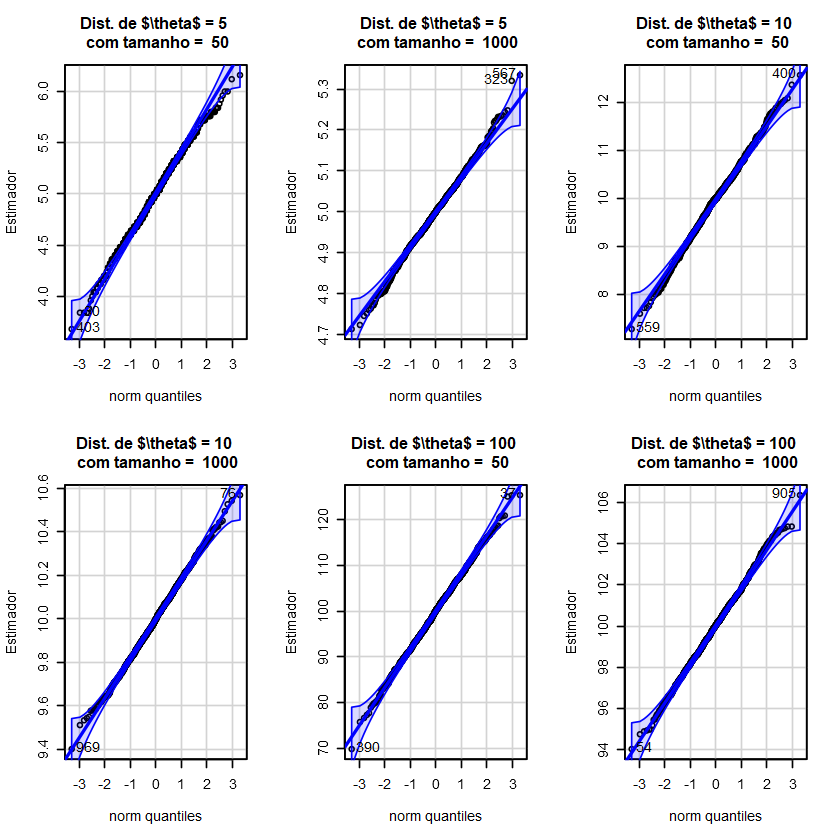

In [2]:
set.seed(123)

n <- c(50,100,200,500,1000)
REP <- 1000
theta <- c(5,10,100)
vicios <- erros <- teorico <- ic <- ics <- ampl <- c()
l <- 0
par(mfrow = c(2,3))
tempo <- system.time({
  for (j in theta) {
    for (i in n) {
      l <- l+1
      amostra <- replicate(REP,rdunif(n = i, b = j))
      media_amostra <- apply(amostra,2,mean)
      estim <- 2*media_amostra-1
      if (i == 50 | i == 1000) {
        car::qqPlot(estim, main = paste('Dist. de $\\theta$ =',j,'\n com tamanho = ',i), ylab = 'Estimador')
        }
      bias <- mean(estim) - j
      REQM <- sd(estim)
      vicios <- c(vicios,bias)
      erros <- c(erros,REQM)
      teorico <- c(teorico,sqrt((j^2-1)/(3*i)))
      a1 <- round(mean(estim) - 1.96*mean(REQM),5)
      a2 <- round(mean(estim) + 1.96*mean(REQM),5)
      ampl <- round(c(ampl,a2-a1),5)
      ic <- c(paste('[',a1,'; ',a2,']',sep = ''))
      ics <- c(ics,ic)
}
    }
  })


Perceba que para qualquer $\theta$, o estimador segue uma distribuição normal independente do número de amostras, isso nos garante que é possível construir intervalos de confiança para $\hat\theta$ utilizando a tabela de distribuição normal.

Vamos entender como se comporta o Tamanho da Amostra em relação ao REQM


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 45.25"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 154.75"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 6.4762e+05"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 5"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 5"
Warning message in sqrt(sum.squares/one.delta):
"NaNs p

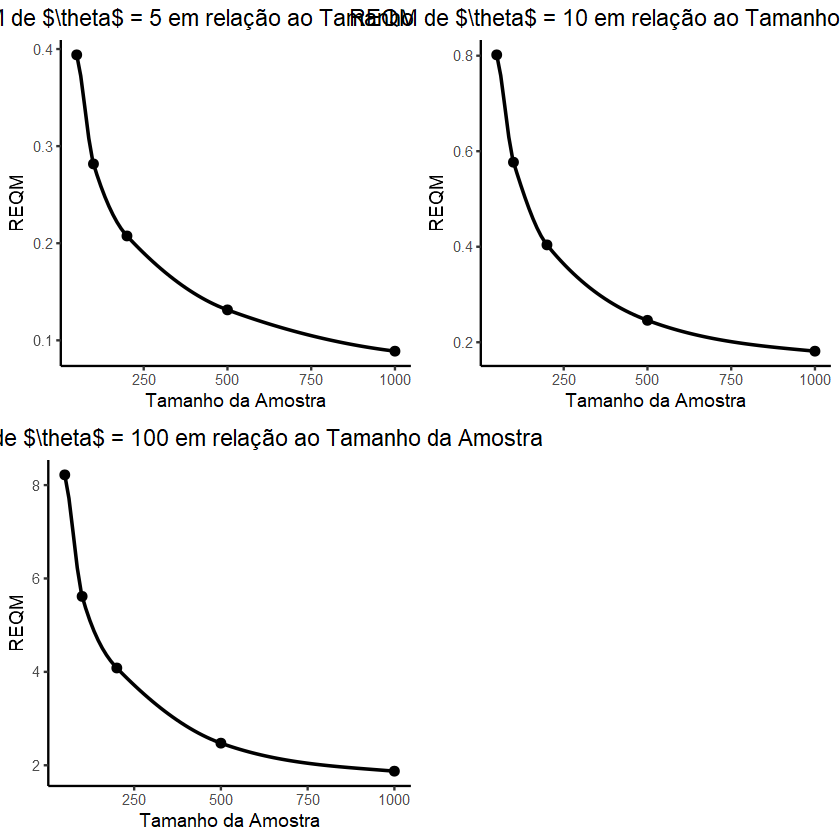

In [9]:
tempo2 <- system.time({
    par(mfrow = c(1,1))
  tema <- theme_set(theme_classic())
  g1 <- ggplot() +
    geom_point(mapping = aes(y = erros[1:5], x = n), size = 2) +
    geom_smooth(mapping = aes(y = erros[1:5],x=n), linetype = 1, colour = 'black', linewidth = .75) +
    labs(title = 'REQM de $\\theta$ = 5 em relação ao Tamanho da Amostra',
         y = 'REQM',
         x = 'Tamanho da Amostra') +
      tema
  g2 <- ggplot() +
    geom_point(mapping = aes(y = erros[6:10], x = n), size = 2) +
    geom_smooth(mapping = aes(y = erros[6:10],x=n), linetype = 1, colour = 'black', linewidth = .75) +
    labs(title = 'REQM de $\\theta$ = 10 em relação ao Tamanho da Amostra', 
          y = 'REQM', 
          x = 'Tamanho da Amostra') +
    tema
  g3 <- ggplot() +
    geom_point(mapping = aes(y = erros[11:15], x = n), size = 2) +
    geom_smooth(mapping = aes(y = erros[11:15],x=n), linetype = 1, colour = 'black', linewidth = .75) +
    labs(title = 'REQM de $\\theta$ = 100 em relação ao Tamanho da Amostra', 
                   y = 'REQM', 
                   x = 'Tamanho da Amostra') +
    tema
  theme_update(plot.title = element_text(hjust = 0.5))
  print(plot_grid(g1,g2,g3))
})


O gráfico demonstra que a relação do REQM e o Tamanho da Amostra para cada $\theta$ se comporta de maneira similar.



In [10]:
tempo2 + tempo



  usuário   sistema decorrido 
     8.52      0.22     17.97 

O código levou 20 segundos para ser simulado.

Analisando os resultados em tabelas


In [11]:
## TABELA DE VICIOS E ERROS

tabela_vicio <- data.frame(
  n_amostras = n,
  vicio = vicios,
  reqm = erros,
  reqm_teo = teorico,
  theta = rep(theta,5)
)

## TABELA DE ITNERVALO DE CONFIANCA

tabela_confianca <- data.frame(
  n_amostras = n,
  intervalo = ics,
  amplitude = ampl,
  theta  = rep(theta,5)
)

## TABELA DE QUEDA PROPORCIONAL DO EQM

tax_qued_reqm <- abs(c(round((erros[5]/erros[1]) -1,5)*100,
              round((erros[10]/erros[6]) -1,5)*100,
              round((erros[15]/erros[11]) -1,5)*100))

tabela_queda <- data.frame(
  taxa = tax_qued_reqm,
  theta = theta
)

write.csv2(tabela_vicio, 'data/vies_mm.csv', row.names = F)
write.csv2(tabela_confianca, 'data/confianca_mm.csv', row.names = F)
write.csv2(tabela_queda, 'data/queda_mm.csv', row.names = F)


In [6]:
## FILTRANDO PELO TAMANHO DE THETA

tabela_vicio |> 
  filter(theta == 5)
tabela_vicio |> 
  filter(theta == 10)
tabela_vicio |> 
  filter(theta == 100)


n_amostras,vicio,reqm,reqm_teo,theta
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
50,0.003000,0.3940120,0.4000000,5
500,0.000736,0.1313829,0.1264911,5
100,-0.020320,0.5769742,0.5744563,5
1000,-0.001528,0.1813365,0.1816590,5
200,0.098740,4.0833427,4.0822788,5


n_amostras,vicio,reqm,reqm_teo,theta
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,0.00286,0.28168700,0.28284271,10
1000,-0.00054,0.08885189,0.08944272,10
200,-0.01740,0.40386600,0.40620192,10
50,-0.13040,8.21923371,8.16455755,10
500,-0.02770,2.47355571,2.58185979,10


n_amostras,vicio,reqm,reqm_teo,theta
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
200,0.002380,0.2075119,0.2000000,100
50,-0.036120,0.8017594,0.8124038,100
500,-0.009016,0.2459135,0.2569047,100
100,0.140800,5.6161606,5.7732140,100
1000,0.017850,1.8734585,1.8256506,100


É possível observar que o vício de cada $\theta$ se aproxima de 0 quando o Número de Amostra aumenta, oque concorda com o viés calculado. Para o REQM, nota-se que o valor também diminui de acordo com o Número de Amostra, é possível analisar que o valor Teórico do REQM é bastante próximo dos valores simulados, nos dando certa garantia de que não houve erro nos cálculos e nem na simulação. Uma vez garantido a segurança entre os valores teóricos e os valores simulados, percebe-se que para cada valor $\theta$ os valores das propriedades do estimador aumentam, em $\theta = 100$ os valores do REQM se tornam absurdamente grandes. Analisando melhor, faz sentido que para $\theta$ grande o REQM aumente, já que $\theta$ é elevado ao quadrado no numerador.



In [7]:
tabela_confianca |> 
  filter(theta == 5)
tabela_confianca |> 
  filter(theta == 10)
tabela_confianca |> 
  filter(theta == 100)


n_amostras,intervalo,amplitude,theta
<dbl>,<chr>,<dbl>,<dbl>
50,[4.23074; 5.77526],1.54452,5
500,[4.74323; 5.25825],0.51502,5
100,[8.84881; 11.11055],2.26174,5
1000,[9.64305; 10.35389],0.71084,5
200,[92.09539; 108.10209],16.00670,5


n_amostras,intervalo,amplitude,theta
<dbl>,<chr>,<dbl>,<dbl>
100,[4.45075; 5.55497],1.10422,10
1000,[4.82531; 5.17361],0.34830,10
200,[9.19102; 10.77418],1.58316,10
50,[83.7599; 115.9793],32.21940,10
500,[95.12413; 104.82047],9.69634,10


n_amostras,intervalo,amplitude,theta
<dbl>,<chr>,<dbl>,<dbl>
200,[4.59566; 5.4091],0.81344,100
50,[8.39243; 11.53533],3.14290,100
500,[9.50899; 10.47297],0.96398,100
100,[89.13313; 111.14847],22.01534,100
1000,[96.34587; 103.68983],7.34396,100


Perceba que a amplitude do intervalo de cada $\theta$ diminui de acordo com o Número de Amostra, comprovando a acurácia do estimador, $\theta = 100$ chama atenção novamente, pois apresenta intervalos muito grandes, porém como debatido anteriormente, é coerente que para $\theta$ de ordem grande algumas propriedades tenham valores altos.



In [8]:
tabela_queda



taxa,theta
<dbl>,<dbl>
77.449,5
77.383,10
77.206,100


Certifica a afirmação de que o REQM tem uma taxa de queda ao longo do Tamanho da Amostra com cada valor de $\theta$ bem próxima.

# Análise dos Resultados – Método dos Momentos

O estimador obtido pelo método dos momentos, $\hat{n}_{MM} = 2\bar{X} - 1$, apresentou desempenho razoável nas simulações, especialmente para tamanhos amostrais maiores.

Através da análise do viés e do erro quadrático médio (REQM), observou-se que:

- Para **n pequenos (ex: 10)** e **amostras pequenas (n = 5, 10)**, o estimador mostrou maior variação e tendência de subestimação.
- À medida que o **tamanho da amostra aumenta**, o viés diminui, e o estimador se aproxima do valor real do parâmetro — um indicativo de **consistência**.
- Os gráficos reforçam que a **distribuição das estimativas se estreita** conforme o tamanho da amostra aumenta, reduzindo a dispersão dos valores.

Portanto, embora o estimador por MM não seja o mais eficiente estatisticamente, ele apresenta boa performance em situações com amostras maiores, sendo uma alternativa simples e válida em muitos contextos práticos.
